<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Metodo_Dirichlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Metodo implicito de Richardson

####Problema a resolver
Queremos resolver la ecuacion de calor
$\frac{\partial u}{\partial t} = k \frac{\partial ^2 u }{\partial x^2 }$ con
#####$ 0 \leq x \leq L, t \geq 0 $



*   Condicion inicial $u(x,0=)f(x)$
*   Condicion de frontera (Dirichlet) $u(0,t) = lll u(L,t) = iii $



Se escribe en diferencias finitas como $(1 + 2\lambda)u_{i,j} - \lambda u_{i+1,j} - \lambda u_{i-1,j} = u_{i,j-1}$


con $\lambda = \frac{\alpha ^2 k}{h}$

El método implícito de diferencias finitas es una técnica para resolver ecuaciones diferenciales discretizando el dominio en una malla y aproximando las derivadas. En este método, los valores futuros de la solución se calculan a partir de los valores presentes y futuros de los nodos vecinos, lo que resulta en un sistema de ecuaciones algebraicas que se deben resolver simultáneamente para cada paso de tiempo

Importando las librerias necesarias

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #necesario para 3D
from matplotlib import cm


Definimos $f(x)=sen(\pi x)$

In [2]:
def f(x):
  return np.sin(np.pi*x)

In [3]:
A = sp.Matrix([[3, -1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3, -1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3, -1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3, -1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3, -1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3, -1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3, -1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3, -1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3]])

In [4]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

**Ejercicio 1**: Codificar la matriz A de manera más simple.



*   **Primero creando una matriz de ceros**


sp.zeros(n) genera una matriz
de tamaño $n$ x $n$ llena de ceros.


> Agregar bloque entrecomillado


En este caso, n = 9, así que A comienza como:

\[
A =
\begin{pmatrix}
0 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{pmatrix}
\]


Esto sirve como base para rellenar después las diagonales.

In [13]:
n = 9
A = sp.zeros(n)  # matriz 9×9 de ceros




*   **Rellenar la diagonal principal**


El ciclo:

va desde i = 0 hasta i = 8

coloca un 3 en cada posición A[i, i]

Después de este paso, la diagonal principal se ve así:

diag(A)=(3,3,3,3,3,3,3,3,3)






In [14]:
for i in range(n):
    A[i, i] = 3



*   **Rellenar la diagonal superior**

La diagonal superior está formada por elementos justo a la derecha de la diagonal principal:

(0,1),(1,2),(2,3),…,(7,8)

Como sólo hay 8 posiciones, el ciclo va de 0 a 7 (n-1 iteraciones).

En cada una se asigna:
A[i,i+1]=-1

In [15]:
for i in range(n-1):
    A[i, i+1] = -1

*   **Rellenar la diagonal inferior**

In [16]:
for i in range(n-1):
    A[i+1, i] = -1

In [17]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [18]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])

In [19]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

**Ejercicio 2**: Definir las entradas de b de manera más simple (quizás con un bucle).

Primero se hace una lista vacia, el ciclo for toma los valores del 1 al 9.
despues se evalua en la funcion y se vuelve a guardar en la lista convirtiendo la lista en un vector

In [20]:
valores = []
for i in range(1, 10):
    valores.append(f(0.1 * i))

b = sp.Matrix(valores)

In [21]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [ ]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [34]:
def richardson(A, b, j):
  S = []
  b_1 = b.copy()

  for i in range(j+1):
      S.append(np.array(b_1, dtype=float).reshape(-1))
      sol = A.LUsolve(b_1)
      b_1 = sol

  return np.array(S), b_1

**Ejercicio 4**: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).

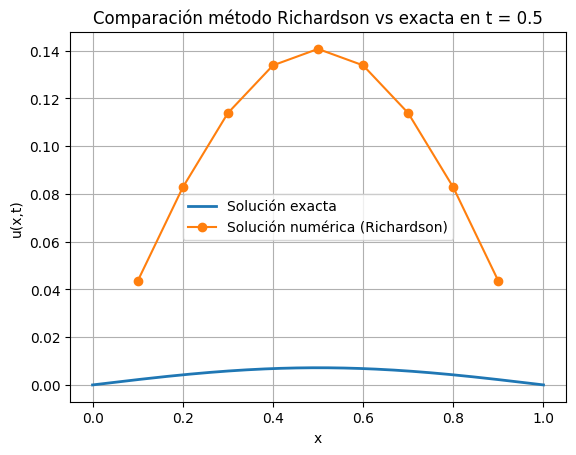

In [36]:
import numpy as np
import matplotlib.pyplot as plt

S, sol_num = richardson(A, b, j)
# Tamaño del paso espacial
h = 1/(len(sol_num) + 1)

#Tiempo para comparar
t = 0.5

#Solución exacta de la ecuación de calor
x_exacta = np.linspace(0, 1, 200)
u_exacta = np.exp(-np.pi**2 * t) * np.sin(np.pi * x_exacta)

#Puntos de la solución numérica
x_num = np.array([i*h for i in range(1, len(sol_num)+1)])


plt.plot(x_exacta, u_exacta, label="Solución exacta", linewidth=2)
plt.plot(x_num, sol_num, "o-", label="Solución numérica (Richardson)", markersize=6)

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title(f"Comparación método Richardson vs exacta en t = {t}")
plt.legend()
plt.grid()
plt.show()


**Ejercicio 5**:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

No es necesario resolver el sistema 9×9 porque las condiciones de frontera ya son conocidas y permiten simplificar las ecuaciones, reduciendo mucho el sistema.

In [23]:
j = 20 #numero de pasos en el tiempo

In [24]:
U = richardson(A, b, j)

In [25]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.6, j+1)
X, Y = np.meshgrid(x, y)


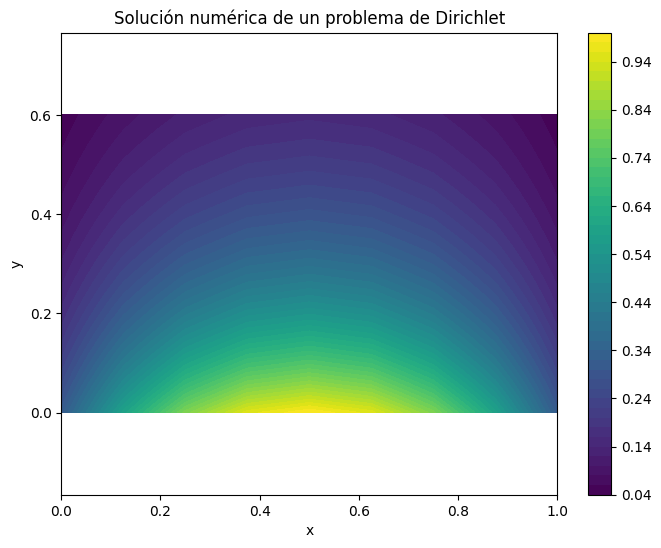

In [26]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=50, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

**Explicacion** La gráfica muestra cómo la temperatura va “disminuyendo” conforme avanza el tiempo, lo cual es exactamente el comportamiento natural de la ecuación de calor.

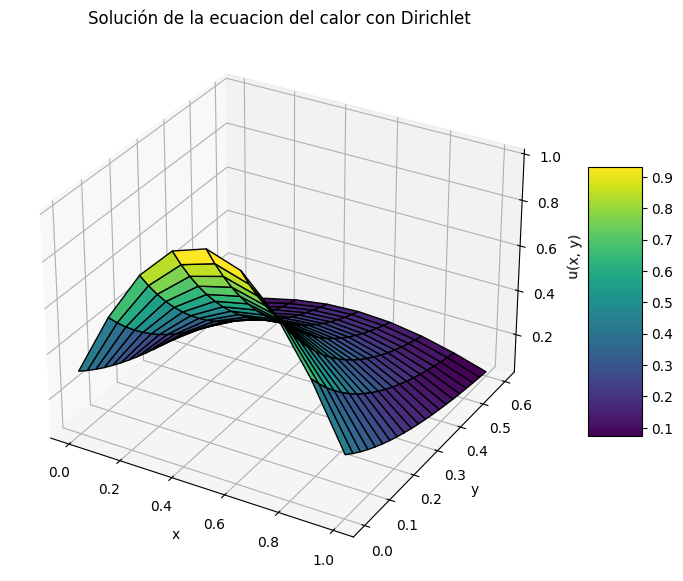

In [27]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuacion del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Explicacion**: La superficie 3D representa la evolución de la solución numérica de la ecuación del calor.
A medida que el tiempo aumenta (eje Y), la superficie pierde relieve, indicando que la temperatura tiende a un estado cada vez más uniforme.

**Ejercicio 6**: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

Las gráficas pueden verse imprecisas porque la malla usada es muy gruesa:
hay pocos puntos en
x y pocos pasos en el tiempo.
Con tan poca resolución, la solución se aproxima de forma limitada y no refleja con claridad los detalles pequeños del comportamiento real.